Code from Sangpil after 1s with him on Mon 5 May 2025 disucssing NLP research and NLP class

# Demos for Dependency tree, Constituency tree, and SRL

### File load instruction for **Hipergator** user (Please use CAP4641-PROJECTS kernel)
*Allennlp_SRL.zip* has been provided to you through Canvas. You **Must** unzip this folder in **your local drive** and upload this under **Drive on your Hipergator using Globus,[link to Globus](https://www.globus.org/))**, so that you can mount the folder to this notebook. Brief instruction video for Globus is **[here](https://drive.google.com/file/d/1hVmY9URDktKHRSbdWH73MRQShD2Zhq9I/view?usp=sharing)**. If you follow these steps, the pathnames used in this project will work. See example file structure below,

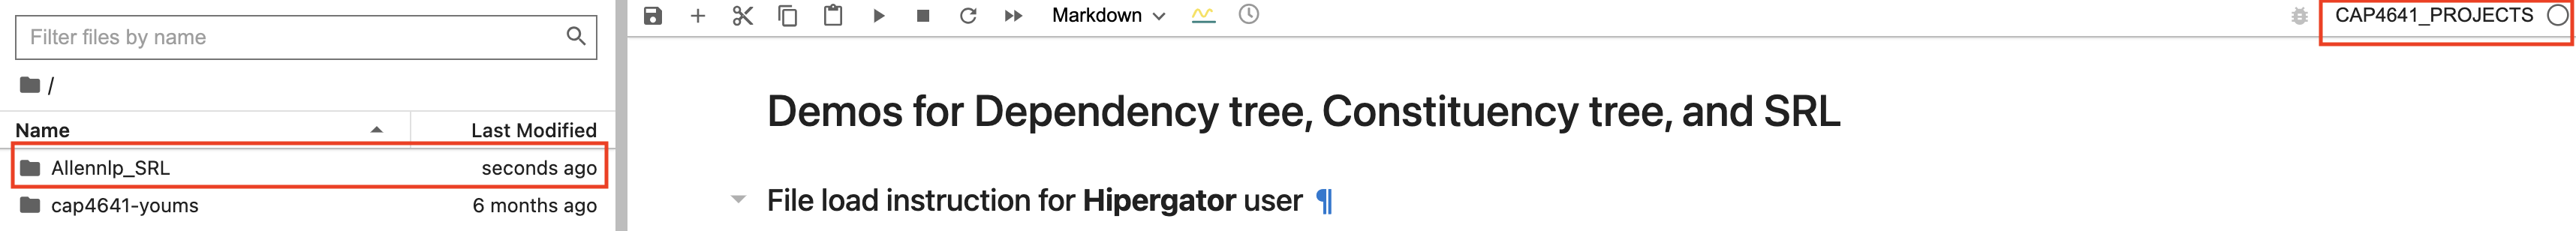

### File load instruction for **Google colab** user

*Allennlp_SRL.zip* has been provided to you through Canvas. You **Must** unzip this folder in **your local drive** and upload this under **your MyDrive on your Google Drive**, so it enables you to mount the folder to this notebook. If you follow these steps, the pathnames used in this project will work. See example file structure below,

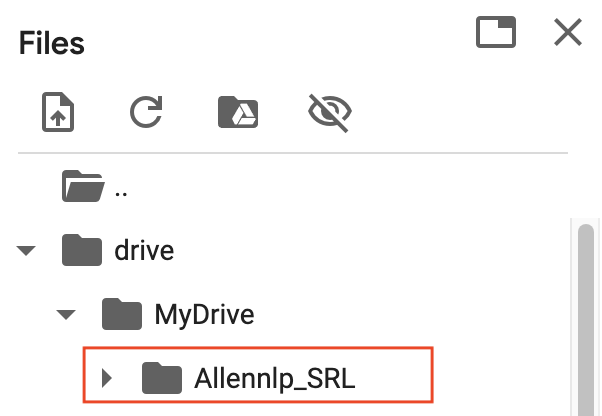

## (For Hipergator User) Import the packages (It may takes 3-6 minutes)

In [ ]:
import pandas as pd
import nltk
from allennlp.predictors.predictor import Predictor
from IPython.display import display, HTML

## (For Google Colab User) Installing and importing the packages (It may takes 3-6 minutes)

In [ ]:
!pip install spacy
!pip install --upgrade huggingface-hub==0.24.0
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

import pandas as pd
import nltk
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.0/419.0 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires huggingface-hub>=0.25.0, but you have huggingface-hub 0.24.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Only for Google Colab User: Run this cell to set up your file path (Do not run this code if you use Hipergator)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# path = '/content/drive/MyDrive/Allennlp_SRL'
# dir = path
# %cd -q $dir

# !ls

# # Now you can import srl_vis
# import srl_vis

Mounted at /content/drive


## Only for Hipergator user: Run this cell to set up your file path (Do not run this code if you use Google Colab)

Since `.so` file is invisible in the folder in Jupyter, although it is there, you must check the flie list after you run the `!ls` in the cell below. See example file list below,

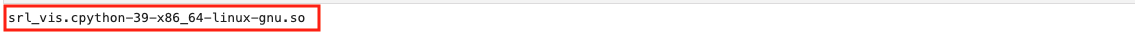

In [ ]:

#enter your hipergator user name here
hipergator_user_name = #please insert your hipergator_user_name (i.e., youms (usually your ufid))

path = '/home/'+hipergator_user_name+'/Allennlp_SRL/hipergator'
dir2 = path

%cd -q $dir2

!ls

# Now you can import srl_vis
import srl_vis

## Sentence to be tested



In [ ]:
sentence = "The book moves easily"

## Checking for Dependency tree

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)
options = {"compact": True, "bg": "white",
           "color": "black", "font": "Source Sans Pro"}
spacy.displacy.render(doc, style="dep",jupyter=True, options = options) #dep for dependency parsing

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


## Checking for Named Entity Recognition (NER)

In [ ]:
spacy.displacy.render(doc, style="ent",jupyter=True) #ent for NER

## (Only works in Hipergator) Checking for Semantic Roles

In [ ]:
en_srl_predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz",
                                       predictor_name = "semantic_role_labeling")

In [ ]:
srl_result = srl_vis.srl_prediction(en_srl_predictor,sentence)

display(HTML(srl_result.to_html()))

## (Only works in Hipergator) Checking for Constituency tree

In [ ]:
const_predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/elmo-constituency-parser-2020.02.10.tar.gz",
                                      predictor_name="constituency_parser")

In [ ]:
preds = const_predictor.predict(sentence)
print("Constituency tree:", preds["trees"])
tree = nltk.Tree.fromstring(preds["trees"])
tree.pretty_print()